# 1. Introduction aux attaques par canaux auxiliaires pour AES

## 1.1 - Définition

Les **attaques par canaux auxiliaires** ou *(Side-Channel Attacks ou **SCA**)* sont des **attaques passives** et **non-invasives** où l’attaquant va **observer** et **mesurer** les caractéristiques **analogiques de l’implémentation logicielle ou matérielle d’un algorithme de chiffrement**, afin d’extraire la clé de chiffrement. Les principales caractéristiques analogiques utilisées en SCA sont le **temps d’exécution**, la **consommation électrique** et les **émissions électromagnétiques**.

## 1.2 - AES

Advanced Encryption Standard *(**AES**)* est un algorithme de **chiffrement symétrique par blocs**, dérivé de la famille d'algorithmes de *Rijndael*, qui utilise différentes tailles de clés et de blocs. AES est utilisé en $3$ versions différentes, **AES-128** *($10$ rondes)*, **AES-192** *($12$ rondes)* et **AES-256** *($14$ rondes)* qui utilisent respectivement une **taille de clé de $128$, $192$ et $256$** bits ainsi qu'une **taille de blocs de $128$ bits**.


### 1.2.1 - Rappel fonctionnement AES

À chaque ronde, une clé distincte, nommée **Round Key** *($K_i$)*, est utilisée, et toutes ces clés sont dérivées
de la clé secrète $K$.

> **_NOTE:_**  La première et dernière ronde diffèrent des autres.

<center>
<img src="images/AESRounds.png"
     alt="Rondes AES-128"
     style="" 
     width="200"
     height="auto"/>
</center>

#### 1.2.1.1 - AddRoundKey

Chaque bits du bloc de données en cours de chiffrement est $XOR$ avec la clé de la ronde $(Ki)$.

<br>
<center>
<img src="images/aes_addroundkey.svg.png"
     alt="Operation AddRoundKey"
     style="" 
     width="300"
     height="auto"/>
</center>

#### 1.2.1.2 - SubBytes

**Substitution non linéaire** où chaque octet de l’état est remplacé par un autre octet selon une table de correspondance *(table de substitution ou **S-box**)*. Cette substitution renforce la **diffusion** des données.

<br>
<center>
<img src="images/aes_subbytes.png"
     alt="Operation AddRoundKey"
     style="" 
     width="300"
     height="auto"/>
</center>

#### 1.2.1.3 - ShiftRows

Effectue une **transposition cyclique** des lignes de l’état. La première ligne reste inchangée, la deuxième est décalée d’un octet vers la gauche, la troisième de deux octets, et la quatrième de trois octets. Cela contribue à la **confusion** en modifiant l’ordre des données.

<br>
<center>
<img src="images/aes_shiftrowssvg.png"
     alt="Operation AddRoundKey"
     style="" 
     width="350"
     height="auto"/>
</center>


#### 1.2.1.4 - MixColumns

Opération de mélange linéaire sur les colonnes du bloc. Chaque colonne est multipliée par la matrice hexadécimal $4 \times 4$ fixe suivante:

$$
C = \begin{bmatrix}
    02 & 03 & 01 & 01\\
    01 & 02 & 03 & 01\\
    01 & 01 & 02 & 03\\
    03 & 01 & 01 & 02
    \end{bmatrix}
$$

<br>
<center>
<img src="images/aes_mixcolumns.png"
     alt="Operation AddRoundKey"
     style="" 
     width="300"
     height="auto"/>
</center>

#### 1.2.1.5 - Vecteur d'Initialisation

Un **vecteur d’initialisation** *($IV$)* est utilisé dans AES comme pour la majorité des systèmes de chiffrement par blocs. Son utilisation permet d’obtenir deux chiffrés *($C$)* différents à partir du même texte clair *($P$)* à condition de ne jamais réutiliser le même $IV$ avec une clé identique. À noter que l’utilisation d’un $IV$ sur un $P > 128$, nécessitera un seul vecteur d’initialisation pour l’ensemble des blocs.

#### 1.2.1.5 - S-box

La **Rijndael S-box** *(**S-box**)* est une méthode permettant d’ajouter de la non-linéarité dans le processus de chiffrement de AES utilisée lors de l’opération $SubBytes()$. **S-box est une table de substitution** de taille $16 \times 16$ permettant de transformer n’importe quelle valeur codée sur $8$ bits en une autre valeur.

In [2]:
import numpy as np

AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
])

#### 1.2.1.6 - Modes d’opérations

AES découpe le message en blocs de taille 128 bits, il est donc nécessaire de chaîner les blocs entre eux afin de garantir l’**intégrité** du message. Il existe plusieurs modes de chaînage *(**CBC**, **CFB**, **OFB**)*. Dans ce lab, nous allons nous concentrer sur **CBC**.

<ins>Chiffrement avec le mode à CBC:
<br>
<center>
<img src="images/CBCChiffrement.png"
     alt="Chiffrement CBC"
     style="" 
     width="500"
     height="auto"/>
</center>


<ins>Déchiffrement avec le mode CBC:
<br>
<center>
<img src="images/CBCDechiffrement.png"
     alt="Dechiffrement CBC"
     style="" 
     width="500"
     height="auto"/>
</center>

### 1.2.2 - Attaques par canaux auxiliaires pour AES

Les attaques par canaux auxiliaires pour AES, cible souvent la fonction `SubByte`. Dans la suite de cette section, nous allons vous expliquer pourquoi.

Les valeurs ciblées par les attaques **Correlation Power Analysis *(CPA)*** sont du type $S(p\oplus k)$, où $p$ est un texte en clair et $k$ un octet de clé, et où $S$ établit une correspondance bijective entre les octets. Pour trouver la bonne clé $k_0$, nous faisons une corrélation de la consommation d'énergie avec le **poids de Hamming** *(Nombre de bits qui sont à $1$)* de $S(p\oplus k)$. La valeur absolue de cette corrélation doit être plus élevée pour la bonne clé $k_0$ à l'instant $t_0$ lorsque la sortie de la $SBox$: $S$ est traitée par le CPU.

Soit $k_1$ une deuxième clé. Si $S$ est **linéaire**, alors $S(p\oplus k_0)\oplus S(p\oplus k_1)=S(k_0\oplus k_1)$ est **indépendante de $p$**. Ainsi, si $S(k_0\oplus k_1)$ a un poids de Hamming de $1$, cela signifie qu'un seul bit pour tous les octets du texte clair $p$ diffère. C'est une mauvaise situation pour l'attaquant, car il est difficile de distinguer les octets de la clé qui diffèrent.

Comme la $SBox$ doit protéger AES contre les **attaques linéaires et différentielles**, elle est choisie de telle sorte que $S(x)$ et $S(x\oplus\Delta)$ soient "linéairement aussi **indépendantes** que possible". En particulier, le poid de Hamming est aussi peu corrélés que possible. Ainsi, si vous avez une forte corrélation avec $S(x)$ (pensez à $x=p\oplus k_0$), vous n'aurez pas beaucoup de corrélation avec $S(x\oplus\Delta)$ (pensez à $\Delta=k_0\oplus k_1$), ce qui permet de distinguer facilement les différents octets de la clé.

En d'autres termes, la $SBox$ réel répond à l'hypothèse de base de la **Differential Power Analysis *(DPA)*** selon laquelle les clés erronées donnent des prédictions aléatoires pour la consommation actuelle, alors que la $SBox$ linéaire ne la respecte pas. [(Source)](https://crypto.stackexchange.com/questions/42571/why-are-side-channel-attacks-such-as-spa-dpa-cpa-based-on-the-aes-subbytes-rout)

Ainsi, lorsque la corrélation est forte, nous pouvons être presque sûrs d'avoir la bonne clé.

---

Pour la base de données ASCAD, utilisant AES-128, nous allons cibler la sortie de la première ronde de la fonction `SubBytes` *(S-Box)*. Nous choisissons cette cible, car la valeur de sortie de cette opération dépend uniquement d'un **octet de la clé**, et permet d'effectuer une attaque différentiel *(DPA)* efficace pendant la phase d'attaque [(Source)](https://link.springer.com/book/10.1007/978-0-387-38162-6).

La valeur intermédiaire pour l'octet $j$ de la trace $X_i$ est représenté par:
$$
IV_i = SBox[p_i^j\oplus k_i^j]
$$

# 2 - Introduction au Deep Learning

**Définition \[Deep Learning]:** L’apprentissage profond est un procédé d’**apprentissage automatique** utilisant des **réseaux de neurones** possédant **plusieurs couches de neurones cachées**. Ces algorithmes possédant de très nombreux paramètres, ils **demandent un nombre très important de données afin d’être entraînés**. *[(Source)](https://www.cnil.fr/fr/definition/apprentissage-profond-deep-learning)*

## 2.2 - Convolutional Neural Network (CNN)

**Définition \[Réseaux de Neurones Convolutifs (CNN)]:** Ils utilisent des données tridimensionnelles pour les tâches de **classification d’images et de reconnaissance d’objets**. Ils se distinguent des autres réseaux neuronaux par leurs **performances supérieures avec des entrées de signaux d’image, de
parole ou audio** [(Source)](https://www.ibm.com/fr-fr/think/topics/convolutional-neural-networks).

Les réseaux de neurones convolutifs se révèlent extrêmement utiles pour examiner les profils de consommation énergétique, car ils excellent dans la classification d’images, ce qui leur permet de détecter des différences subtiles entre les traces et d’en extraire des éléments essentiels.

Un CNN est composé de trois couches différentes:
- Couche de **convolution**;
- Couche de **pooling**;
- Couche **entièrement connectée *(FC)***.

<div style="text-align: center;">
    <img src="images/convolution-pooling.png" alt="ConvolutionPooling" style="width: 700px;"><br>
    Exemple de fonctionnement d’un CNN  <a href="https://www.ibm.com/fr-fr/topics/convolutional-neural-networks">(Source)</a>
  </div>

### 2.2.1 - Couche de Convolution

Cette couche nécessite des **données d’entrée**, un **filtre** et une **carte de caractéristiques** *(feature map)* pour son bon fonctionnement.
Le filtre va se déplacer sur l’image pour vérifier si la caractéristique recherchée est présente. C’est ce qu’on appelle la **convolution**.

<div style="display: flex; justify-content: space-around; align-items: flex-start;">

  <div style="text-align: center;">
    <img src="images/fenetreFiltre.png" alt="FenetreFiltre" style="width: 400px;"><br>
    Parcours de la fenêtre de filtre <a href="https://www.ibm.com/fr-fr/topics/convolutional-neural-networks">(Source)</a>
  </div>

  <div style="text-align: center;">
    <img src="images/iclh-diagram-convolutional-neural-networks.png" alt="DiagramConvolutionalNeuralNetwork" style="width: 440px;"><br>
    Application d’un filtre sur une image <a href="https://datascientest.com/en/convolutional-neural-network-everything-you-need-to-know">(Source)</a>
  </div>

</div>
</br>

La taille du filtre peut varier, cependant, dans la majorité des cas, c’est une matrice $3 \times 3$. La taille de la matrice utilisée pour filtrer définit également la taille du champ réceptif *(output array)*. La matrice de sortie est calculée en réalisant le produit scalaire entre les pixels d’entrée et le filtre. Suite à ça, le filtre se décale d’un cran et répète le processus jusqu’à la fin.
Le résultat final est appelé carte de caractéristiques ou feature map.

Cette couche possède trois hyperparamètres à définir avant le début de l’entraînement du réseau de neurones qui affectent la taille du volume de sortie:
- **Nombre de filtres**: Affecte la profondeur de la sortie. On dira que notre réseau a une profondeur
de $n$, avec $n$ le nombre de filtres.
- **Pas**: Nombre de pixels, que le filtre parcourt sur la matrice d’entrée. Un pas plus grand produit une sortie plus faible.
- **Marge** *(zero-padding)*: Utilisée lorsque les filtres ne correspondent pas à l’image d’entrée. On
distingue trois types de marge:
    - **Marge valide:** Abscence de marge, la dernière convolution est supprimée si les dimensions ne s’alignent pas.
    - **Marge identique:** Garantit que la couche de sortie a la même taille que la couche d’entrée.
    - **Marge pleine:** Augmente la taille de la sortie en ajoutant des zéros à la bordure de l’entrée

***Exemple de code Python pour générer une couche de convolution:***

In [16]:
from tensorflow.keras import layers, models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

### 2.2.2 Couche de pooling

Cette couche permet de **réduire la dimensionnalité**, ce qui réduit le nombre de paramètres d’entrée.
Encore une fois, un filtre parcourt toute l’entrée. Cependant, cette fois, le filtre n’a aucun poids. Une fonction d’agrégation va être appliquée aux valeurs de la matrice d’entrée pour créer la matrice de sortie.

Les deux principaux types de pooling sont:
- **Max-Pooling**: Sélectionne le pixe ayant la valeur maximale;
- **Average-Pooling**: Calcule la valeur moyenne dans le champ réceptif.

<div style="display: flex; justify-content: center; align-items: flex-start;">

  <div style="text-align: center;">
    <img src="images/maxPooling.jpg" alt="MaxPooling" style="width: 375px;"><br>
    Max-Pooling <a href="https://www.ibm.com/fr-fr/topics/convolutional-neural-networks">(Source)</a>
  </div>

  <div style="text-align: center; margin-left: 40px;">
    <img src="images/AveragePooling.jpg" alt="AveragePooling" style="width: 375px;"><br>
    Average-Pooling <a href="https://www.ibm.com/fr-fr/topics/convolutional-neural-networks">(Source)</a>
  </div>

</div>
<br>

Comme vous pouvez le deviner, de nombreuses informations sont perdues dans la couche de pooling. Cependant, cette couche permet de **réduire la complexité**, d’**améliorer l’efficacité** et de **limiter le risque de surajustement** *(overfitting)*.

<div style="text-align: center;">
    <img src="images/downsampling.png" alt="Downsampling" style="width: 300px;"><br>
    Exemple de l’effet du Max-Pooling  <a href="https://www.ibm.com/fr-fr/topics/convolutional-neural-networks">(Source)</a>
  </div>

***Exemple de code Python pour générer une couche de pooling:***

In [17]:
model_cnn.add(layers.MaxPooling2D((2, 2)))

### 2.2.3 Couche entièrement connectée (FC)

Les autres couches sont partiellement connectées. C’est-à-dire que les valeurs de pixel de l’image
d’entrée ne sont pas directement connectées à la couche de sortie.
Pour résoudre cela, il faut une couche entièrement connectée, où chaque nœud de la couche de
sortie se connecte directement à un nœud de la couche de sortie.

Ainsi, cette couche est **placée à la fin du réseau** pour effectuer la classification en fonction des
caractéristiques extraites à partir des couches précédentes et de leurs différents filtres.
Alors que les couches de convolution et de pooling ont tendance à utiliser les fonctions **ReLu**,
les couches FC exploitent généralement une fonction d’activation **softmax** pour classer les entrées de manière appropriée, produisant une probabilité de $0$ à $1$.

***Exemple de code Python pour générer une couche entièrement connectée:***

In [18]:
# En aplatissant les données (Flatten), nous supprimons toute structure spatiale ou temporelle présente dans 
# le tenseur et la convertissons en une forme qui peut être traitée par des couches entièrement 
# connectées.
model_cnn.add(layers.Flatten()) # Utile avec un CNN pour convertir une image dans le format voulu
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(10)) # Nombre de classes possible en sortie

## 2.3 - Multilayer Perceptron (MLP)

MLP est un algorithme d'apprentissage supervisé, qui apprend une fonction $f:R^m\xrightarrow{} R^o$ en s'entraînant sur un dataset, où $m$ est le nombre de dimensions des données en entrée et $o$ le nombre de dimensions pour les sorties *(e.g. nombres de classes)*.

Soit $X = x_1, x_2, \dots, x_m$ les caractéristiques *(features)* et $y$ l'objectif *(target)*. 

Une fois $X$ et $y$ données, le modèle peut apprendre à réaliser une **classification** ou une **régression** grâce à une **fonction non-linéaire**.

Entre l'entré et la sortie, il peut y avoir **une ou plusieurs couches non-linéaires** *(hidden layers)*.

<div style="display: flex; justify-content: center; align-items: flex-start;">

  <div style="text-align: center;">
    <img src="images/multilayerperceptron_network.png" alt="OneHiddenLayerMLP" style="width: 375px;"><br>
    Une couche cachée MLP <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html">(Source)</a>
  </div>

  <div style="text-align: center; margin-left: 40px;">
    <img src="images/MLP.png" alt="MLP" style="width: 375px;"><br>
    MLP <a href="https://becominghuman.ai/multi-layer-perceptron-mlp-models-on-real-world-banking-data-f6dd3d7e998f">(Source)</a>
  </div>

</div>
</br>

Dans l'image de gauche, la couche d'entrée (couche gauche), est un ensemble de neurones $\{x_i\mid x_1,x_2,\dots,x_m\}$ représentant les classes en entrée. Chaque neurone dans la couche cachée *(hidden layer)* transforme la valeur de la couche précédente grâce à une **somme linéaire pondérée** $w_1x_1+w_2x_2+\dots+w_mx_m$ et une fonction d'activation non-linéaire $g(.):R\xrightarrow{} R$ comme la fonction hyperbolic tan. La couche de sortie reçoit les valeurs de la dernière couche cachée et les transforme en valeur de sortie *(prédiction)*.

In [41]:
# https://eprint.iacr.org/2025/471.pdf
input_dim = 100
model_mld = models.Sequential([
    # Couches cachées
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    # Couche de sortie
    layers.Dense(3, activation='softmax')
])

## 2.3 - Visualisation, Entraînement, Test et Évaluation d'un modèle avec tensorflow

Dans cette section, nous allons juste faire un rapide rappel des fonctions utilisés par tensorflow pour **visualiser**, **entraîner**, **tester** et **évaluer** un modèle.

### 2.3.1 - Visualisation du modèle

***Visualisation du CNN:***

In [19]:
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

***Visualisation du MLD:***

In [23]:
model_mld.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,643 (33.76 KB)

 Trainable params: 8,643 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

### 2.3.2 - Compilation et Entraînement du modèle

Nous allons entraîner le modèle CNN, en utilisant un des datasets fournit avec la librairie tensorflow.

Pour faire cela, nous devons dans un premier temps charger la base de donnée:

In [30]:
# https://www.tensorflow.org/tutorials/images/cnn?hl=fr
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalise la valeur des pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Nous pouvons compiler notre modèle, afin dans un second de temps de pouvoir l'entraîner:

In [32]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Maintenant, tout est prêt pour entraîner et tester notre modèle:

In [33]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3890 - loss: 1.6852 - val_accuracy: 0.5432 - val_loss: 1.2903
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5658 - loss: 1.2363 - val_accuracy: 0.5932 - val_loss: 1.1547
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6225 - loss: 1.0777 - val_accuracy: 0.6176 - val_loss: 1.1140
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6510 - loss: 0.9963 - val_accuracy: 0.6324 - val_loss: 1.0513
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6724 - loss: 0.9312 - val_accuracy: 0.6324 - val_loss: 1.0763
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6902 - loss: 0.8916 - val_accuracy: 0.6368 - val_loss: 1.0510
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7043 - loss: 0.8420 - val_accuracy: 0.6390 - val_loss: 1.0668
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7217 - loss: 0.8001 - 

### 2.3.2 - Évaluation du modèle

Une fois le modèle entraîné et testé, il est important de l'évaluer et de visualiser sa précision grâce à un ou plusieurs graphes.

313/313 - 0s - 2ms/step - accuracy: 0.6418 - loss: 1.0722


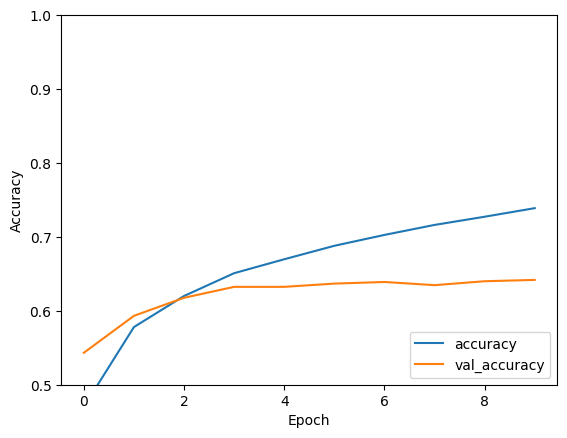

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
plt.show()

# 3 - DLSCA (Deep Learning-based Side-channel Analysis)

## 3.1 - Definition

Avec l’évolution rapide de l’Intelligence Artificielle (IA) dans la dernière décennie, les attaques par canaux auxiliaires n’ont pas échappé à son utilisation. Dans un premier temps avec l’utilisation du **Machine Learning *(ML)*** [15, 16, 17] en utilisant principalement deux algorithmes d’apprentissage: **Support Vector Machine *(SVM)*** et **Random Forest *(RF)***.

Suivant le succès du ML pour attaquer des traces très bruyantes, le **Deep Learning *(DL)*** a fait son apparition avec l’utilisation majoritaire des **Convolutional Neural Network *(CNN)*** et de **Multilayer Perceptron *(MLP)***.

Le DL est devenue une technique précieuse pour les attaques par canaux auxiliaires avec profilage. L'utilisation du ML et du DL a permis la mise en place d'attaques plus performantes, pouvant être utilisées sur des mesures à très hautes dimensions et qui sont résistantes à la déformation du signal comme la gigue *(pour les CNN)* [(Source)](https://eprint.iacr.org/2018/053.pdf). 

## 3.2 - ASCAD

### 3.2.1 - Setup

In [3]:
# Installation des librairies nécessaires pour ASCAD
!pip install numpy h5py matplotlib tqdm tensorflow keras

In [4]:
import os
import h5py
import json
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import platform

In [5]:
if "macOS" in platform.platform():
    !brew install python-tk

==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
To reinstall 3.13.3, run:
  brew reinstall python-tk@3.13


In [6]:
folder_name = "ASCAD"

if not os.path.exists(folder_name):
    !git clone https://github.com/ANSSI-FR/ASCAD.git
else:
    print(f"Folder '{folder_name}' already exists. Skipping git clone.")

Cloning into 'ASCAD'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 109 (delta 12), reused 9 (delta 9), pack-reused 88 (from 1)
Receiving objects: 100% (109/109), 178.25 KiB | 1.70 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [10]:
file_path = "ASCAD_data.zip"

if not os.path.exists(file_path):
    # !wget https://files.data.gouv.fr/anssi/ascadv2/ascadv2-extracted.h5
    !wget https://www.data.gouv.fr/s/resources/ascad/20180530-163000/ASCAD_data.zip
    !unzip ASCAD_data.zip
else:
    print(f"Folder '{file_path}' already exists. Skipping download.")

--2025-04-24 21:48:58--  https://www.data.gouv.fr/s/resources/ascad/20180530-163000/ASCAD_data.zip
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.73, 37.59.183.91
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4435199469 (4.1G) [application/zip]
Saving to: ‘ASCAD_data.zip’

ASCAD_data.zip      100%[===================>]   4.13G  15.1MB/s    in 3m 25s  

2025-04-24 21:52:23 (20.6 MB/s) - ‘ASCAD_data.zip’ saved [4435199469/4435199469]

Archive:  ASCAD_data.zip
   creating: ASCAD_data/
   creating: ASCAD_data/ASCAD_databases/
  inflating: ASCAD_data/ASCAD_databases/ASCAD.h5  
  inflating: ASCAD_data/ASCAD_databases/ASCAD_desync100.h5  
  inflating: ASCAD_data/ASCAD_databases/ASCAD_desync50.h5  
  inflating: ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5  
   creating: ASCAD_data/ASCAD_trained_models/
  inflating: ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes

### 3.2.2 - Chargement des données et des modèles (CNN, MLD)

In [12]:
trained_models_file1 = "./ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5"
trained_models_file2 = "./ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync100_epochs75_classes256_batchsize200.h5"
database_file1 = "./ASCAD_data/ASCAD_databases/ASCAD.h5"
database_file2 = "./ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5"

trained_models_h5_1 = h5py.File(trained_models_file1, "r")
trained_models_h5_2 = h5py.File(trained_models_file2, "r")
database_file_h5_1 = h5py.File(database_file1, "r")
database_file_h5_2 = h5py.File(database_file2, "r")

### 3.2.3 - Définitions des paramètres d'entraînement et de tests

Définition des paramètres pour entraîner un nouveau modèle:
- ascad_database: Chemin d'accès au fichier h5 contenant les traces;
- training_model: Chemin d'accès pour stocker le fichier h5 décrivant le model;
- network_type: Type de réseau de neurone utilisé (CNN ou MLP);
- epochs: Nombre d'epochs;
- batch_size: Taille du batch;

Définition des paramètres pour tester notre modèle:
- model_file: Chemin d'accès au fichier h5 décrivant le model;
- ascad_database: Chemin d'accès au fichier h5 contenant les traces;
- num_traces: Nombre de traces utilisées pour tester;
- save_file: Chemin d'accès pour stocker le graphe correspondant à l'efficacité de notre modèle;

In [14]:
training_parameters_new_model: dict = {"ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                             "training_model": "models/h5/newModelTest.h5",
                             "network_type": "mlp",
                             "epochs": 800,
                             "batch_size": 100}

testing_parameters_new_model: dict = {"model_file": "models/h5/newModelTest.h5",
                            "ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                            "num_traces": 1000,
                            "save_file": "models/plots/plot_new_model.png"}

# More information on the keys: https://github.com/ANSSI-FR/ASCAD/tree/master?tab=readme-ov-file#testing-the-trained-models
testing_parameters_mld: dict = {"model_file": "ASCAD_data/ASCAD_trained_models/mlp_best_ascad_desync0_node200_layernb6_epochs200_classes256_batchsize100.h5",
                            "ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                            "num_traces": 2000,
                            "save_file": "models/plots/plot_test_model_mld_desync0.png"}

testing_parameters_cnn: dict = {"model_file": "ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5",
                            "ascad_database": "ASCAD_data/ASCAD_databases/ASCAD.h5",
                            "num_traces": 2000,
                            "save_file": "models/plots/plot_test_model_cnn_desync0.png"}

with open('models/txt/training/training_parameters_new_model.txt', 'w') as training_file:
     training_file.write(json.dumps(training_parameters_new_model))

with open('models/txt/testing/testing_parameters_new_model.txt', 'w') as training_file:
     training_file.write(json.dumps(testing_parameters_new_model))

with open('models/txt/testing/testing_parameters_mld.txt', 'w') as testing_file:
     testing_file.write(json.dumps(testing_parameters_mld))

with open('models/txt/testing/testing_parameters_cnn.txt', 'w') as testing_file:
     testing_file.write(json.dumps(testing_parameters_cnn))

### 3.2.4 - Entraînement d'un modèle

In [11]:
if not os.path.exists("models/h5/newModelTest.h5"):
    !python3 ASCAD/ASCAD_train_models.py models/txt/training/training_parameters_new_model.txt
else:
    print("Model already trained")
    train_model: str = input("Do you want to train again? [y/N]") or "N"
    if train_model.lower() == "y":
        !python3 ASCAD/ASCAD_train_models.py models/txt/training/training_parameters_new_model.txt

Model already trained


Do you want to train again? [y/N] 


### 3.2.5 - Test d'un modèle

In [8]:
%matplotlib inline
plt.close('all')
%run ASCAD/ASCAD_test_models.py models/txt/testing/testing_parameters_new_model.txt

b
Full path: /Users/gaetan/Documents/M1/ADL/s2/M1_S2_ADL/DLSPA/models/h5/newModelTest.h5
File exists: True
models/plots/plot_new_model.png
Full path: /Users/gaetan/Documents/M1/ADL/s2/M1_S2_ADL/DLSPA/models/h5/newModelTest.h5
File exists: True
Model file:  models/h5/newModelTest.h5
Model weights found in file
File keys: ['model_weights', 'optimizer_weights']
3.11.0
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Computing rank for targeted byte 2


/Users/gaetan/Documents/M1/ADL/s2/M1_S2_ADL/DLSPA/ASCAD/ASCAD_test_models.py:330: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show(block=False)


Press enter to exit ... 


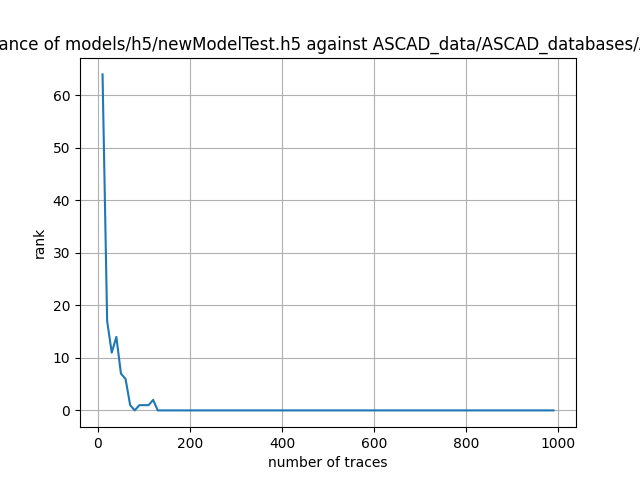

In [9]:
from IPython.display import Image
Image(filename='models/plots/plot_new_model.png') 

# Ressources

## Livres

- [An Introduction to Mathematical Cryptography](https://link.springer.com/book/10.1007/978-1-4939-1711-2)
- [Power Analysis Attacks - Revealing the Secrets of Smart Cards](https://link.springer.com/book/10.1007/978-0-387-38162-6)
- [Serious Cryptography - A Practical Introduction to Modern Encryption](https://nostarch.com/serious-cryptography-2nd-edition)
- [ Power Analysis Attacks - Revealing the Secrets of Smart Cards](https://link.springer.com/book/10.1007/978-0-387-38162-6)

## Sites Web

- [AES - Wikipedia](https://en.wikipedia.org/wiki/Advanced_Encryption_Standard)
- [Qu'est-ce qu'un convolutional neural networks (CNN) ? - IBM](https://www.ibm.com/fr-fr/topics/convolutional-neural-networks)
- [Convolutional Neural Network: Everything You Need to Know - DataScientest](https://datascientest.com/en/convolutional-neural-network-everything-you-need-to-know)
- [Réseau neuronal convolutif (CNN)](https://www.tensorflow.org/tutorials/images/cnn?hl=fr)
- [1.17. Neural network models (supervised)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
- [Why are side channel attacks such as SPA/DPA/ CPA based on the AES SubBytes routine?](https://crypto.stackexchange.com/questions/42571/why-are-side-channel-attacks-such-as-spa-dpa-cpa-based-on-the-aes-subbytes-rout)

## Papiers Scientifiques

- [The Design of Rijndael (AES - The Advanced Encryption Standard)](https://link.springer.com/book/10.1007/978-3-662-04722-4)
- [Announcing the ADVANCED ENCRYPTION STANDARD (AES)](http://csrc.nist.gov/publications/fips/fips197/fips-197.pdf)
- [A Practical Tutorial on Deep Learning-based Side-channel Analysis](https://eprint.iacr.org/2025/471.pdf)
    - [DLSCA-tutorial - Github](https://github.com/marinakrcek/DLSCA-tutorial/tree/main)
 - [Study of Deep Learning Techniques for Side-Channel Analysis and Introduction to ASCAD Database](https://eprint.iacr.org/2018/053.pdf)
    - [ASCAD - Github](https://github.com/ANSSI-FR/ASCAD?tab=readme-ov-file)